In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:

print("Unique values in 'step' column:", df['step'].nunique())
print("Value counts for 'step' column:\n", df['step'].value_counts())



Unique values in 'step' column: 743
Value counts for 'step' column:
 step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


In [5]:
print("\nUnique values in 'type' column:", df['type'].nunique())
print("Value counts for 'type' column:\n", df['type'].value_counts())



Unique values in 'type' column: 5
Value counts for 'type' column:
 type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [6]:
print("\nUnique values in 'isFraud' column:", df['isFraud'].nunique())
print("Value counts for 'isFraud' column:\n", df['isFraud'].value_counts())



Unique values in 'isFraud' column: 2
Value counts for 'isFraud' column:
 isFraud
0    6354407
1       8213
Name: count, dtype: int64


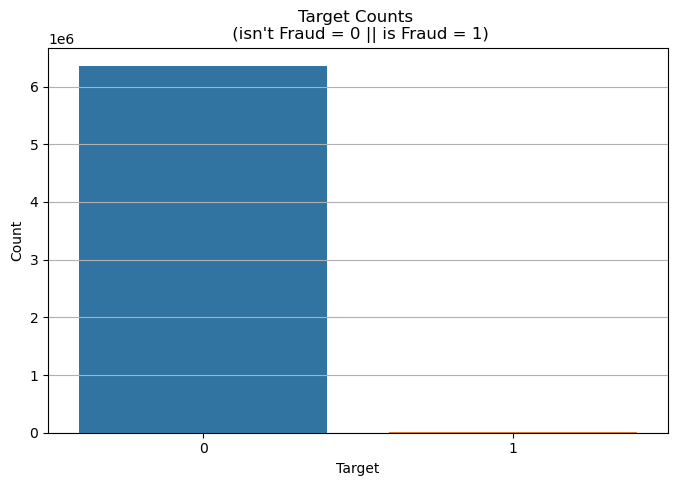

In [7]:
Target_counts = df['isFraud'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

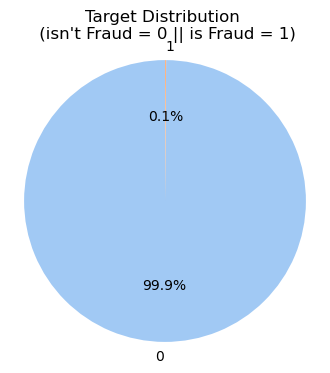

In [8]:
Target_counts = df['isFraud'].value_counts()

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(Target_counts.values, labels=Target_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Target Distribution \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [9]:
print("\nUnique values in 'isFlaggedFraud' column:", df['isFlaggedFraud'].nunique())
print("Value counts for 'isFlaggedFraud' column:\n", df['isFlaggedFraud'].value_counts())


Unique values in 'isFlaggedFraud' column: 2
Value counts for 'isFlaggedFraud' column:
 isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


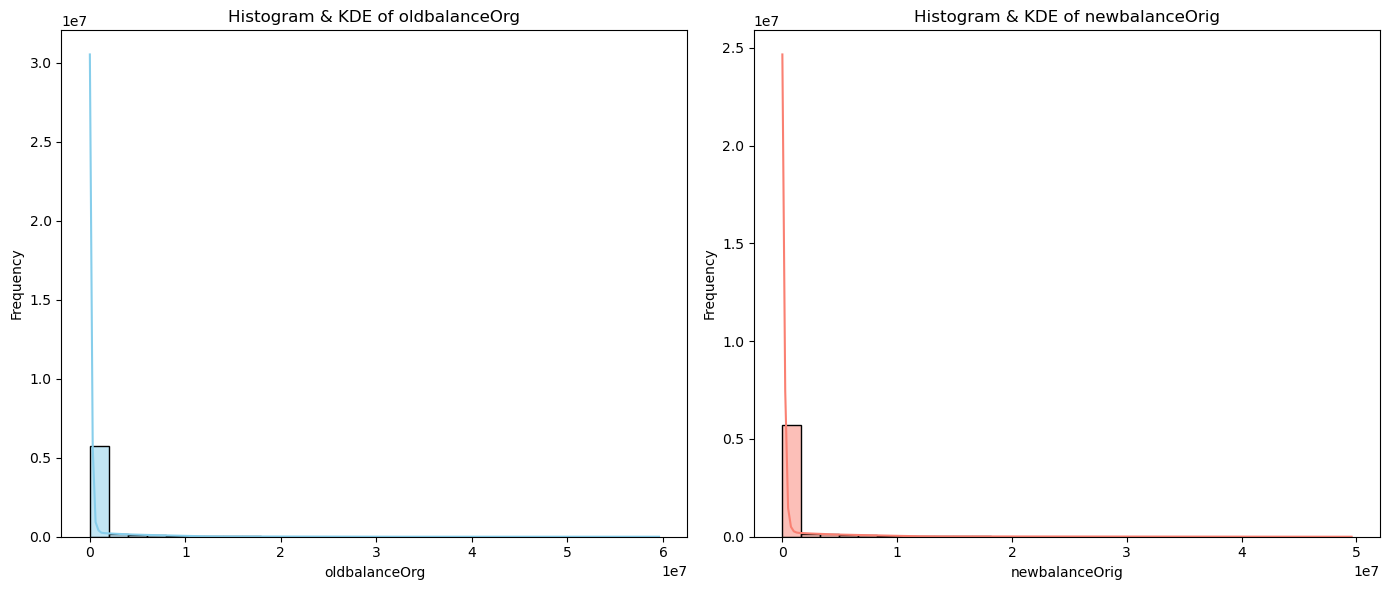

In [10]:
plt.figure(figsize=(14, 6))

# Plot histogram and KDE for 'oldbalanceOrg'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['oldbalanceOrg'], bins=30, kde=True, color='skyblue')
plt.title('Histogram & KDE of oldbalanceOrg')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Frequency')

# Plot histogram and KDE for 'newbalanceOrig'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(df['newbalanceOrig'], bins=30, kde=True, color='salmon')
plt.title('Histogram & KDE of newbalanceOrig')
plt.xlabel('newbalanceOrig')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

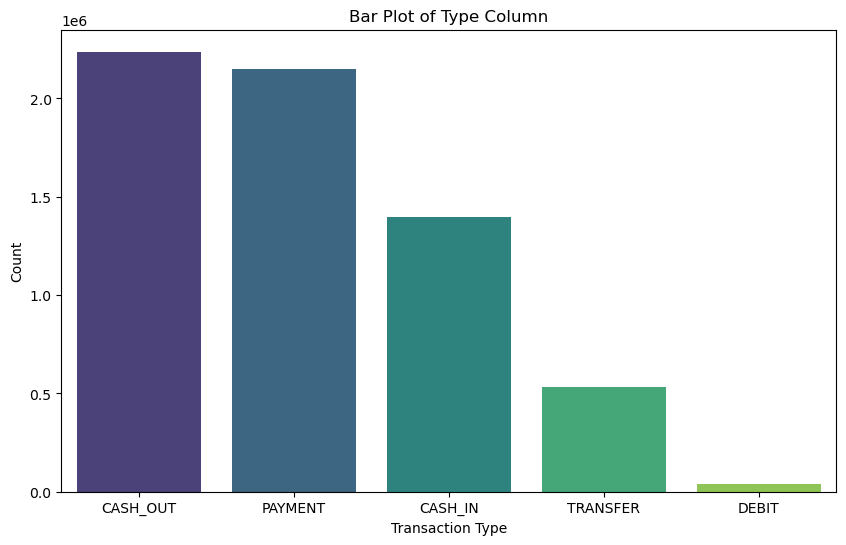

In [11]:
type_counts = df['type'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')

# Add titles and labels
plt.title('Bar Plot of Type Column')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Show the plot
plt.show()

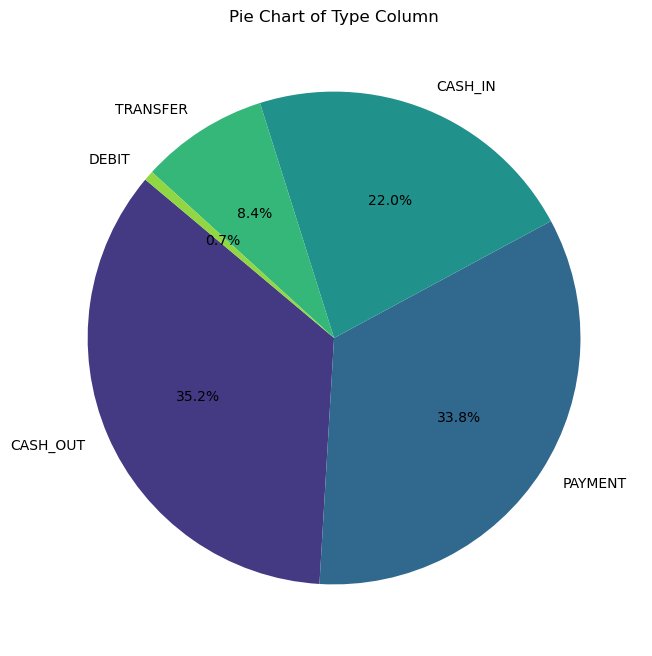

In [12]:
type_counts = df['type'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(type_counts)))

# Add a title
plt.title('Pie Chart of Type Column')

# Show the plot
plt.show()



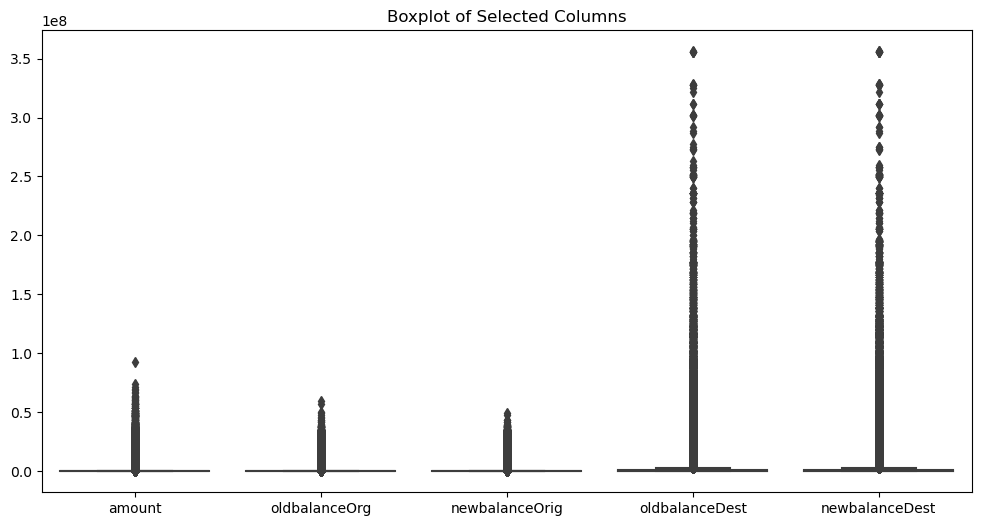

In [13]:
columns_to_plot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])

# Add a title
plt.title('Boxplot of Selected Columns')

# Display the plot
plt.show()

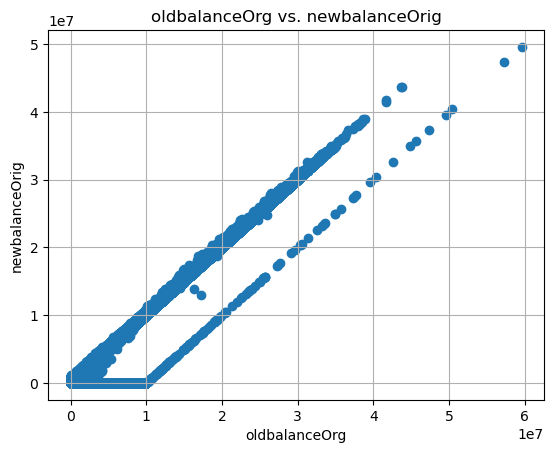

In [14]:
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

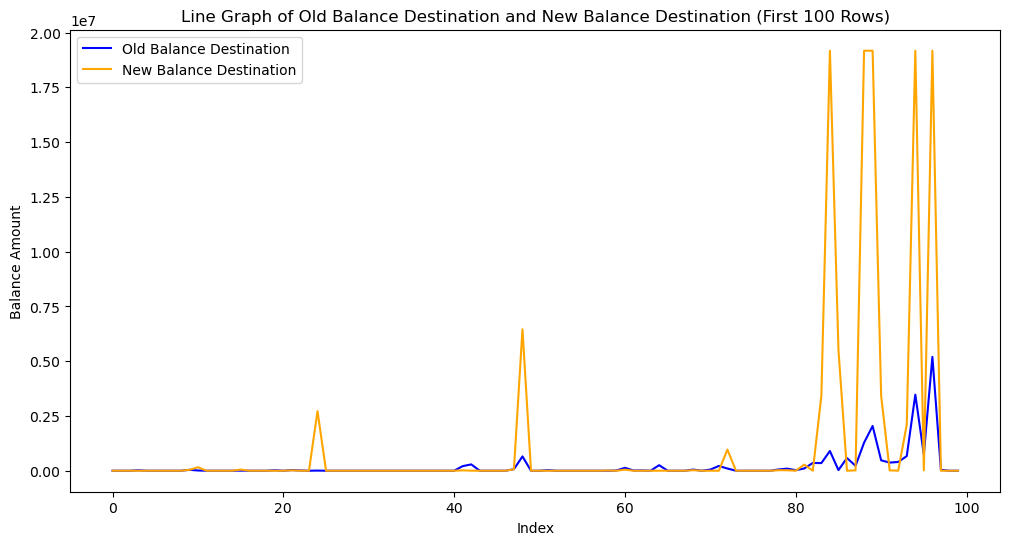

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['oldbalanceDest'][:100], label='Old Balance Destination', color='blue')
plt.plot(df['newbalanceDest'][:100], label='New Balance Destination', color='orange')
plt.title('Line Graph of Old Balance Destination and New Balance Destination (First 100 Rows)')
plt.xlabel('Index')
plt.ylabel('Balance Amount')
plt.legend()
plt.show()


In [16]:
#label encoding

from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()

df['type']=le.fit_transform(df['type'])

print(df['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64


In [17]:
df.drop(['step', 'nameDest', 'isFlaggedFraud','nameOrig'], axis=1, inplace=True)


In [18]:
df.corr()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
type,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833
amount,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


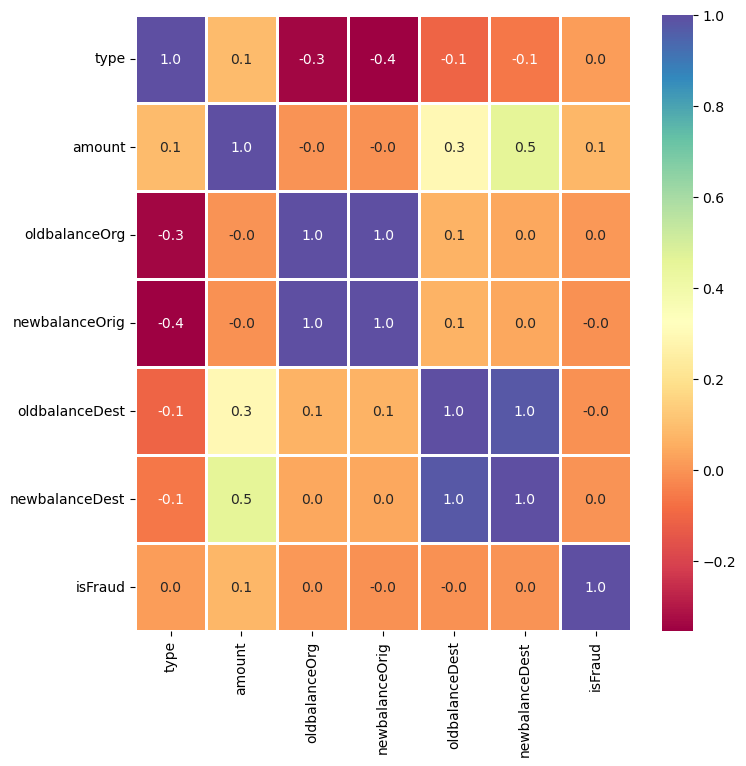

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

In [20]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


# Data Partition and  Data Transformation

In [21]:
# X Data
X = df.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = df['isFraud']
print('y shape is : ' , y.shape)




X shape is :  (6362620, 6)

y shape is :  (6362620,)


In [22]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler
ds=StandardScaler()
X=ds.fit_transform(X)
X=pd.DataFrame(X)
X.head()


,0,1,2,3,4,5
0,0.952399,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,0.952399,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,1.693076,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,-0.528954,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,0.952399,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411


In [24]:
#Data Partition

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453834, 6)
(1908786, 6)
(4453834,)
(1908786,)


In [25]:
print(X.head())
print(y.head())

          0         1         2         3         4         5
0  0.952399 -0.281560 -0.229810 -0.237622 -0.323814 -0.333411
1  0.952399 -0.294767 -0.281359 -0.285812 -0.323814 -0.333411
2  1.693076 -0.297555 -0.288654 -0.292442 -0.323814 -0.333411
3 -0.528954 -0.297555 -0.288654 -0.292442 -0.317582 -0.333411
4  0.952399 -0.278532 -0.274329 -0.282221 -0.323814 -0.333411
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


# Model 


In [26]:
# BY Logistic

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import  LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [40]:
# Quick evaluation
Train_Accuracy = lr.score(x_train, y_train)
Test_Accuracy = lr.score(x_test, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Confusion Matrix:
[[1906236     115]
 [   1457     978]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.40      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score


In [29]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.92 %

➤➤➤ Precision Score :  89.48 %

➤➤➤ Recall Score :  40.16 %

➤➤➤ F1 Score :  55.44 %

➤➤➤ AUC_ROC :  70.08 %



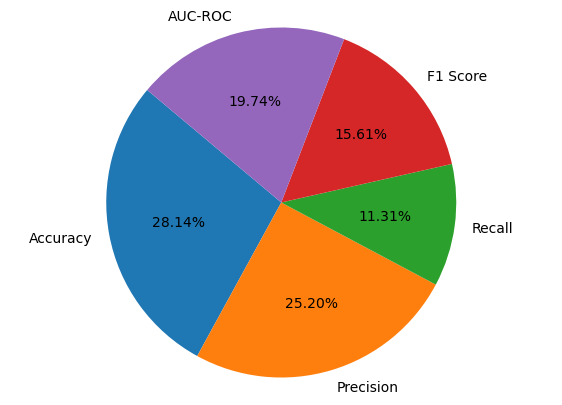

In [30]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [33]:
from sklearn.tree import DecisionTreeClassifier

Model_DT = DecisionTreeClassifier()
Model_DT.fit(x_train, y_train)
y_pred_DT = Model_DT.predict(x_test)

# Quick evaluation
Train_Accuracy = Model_DT.score(x_train, y_train)
Test_Accuracy = Model_DT.score(x_test, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.97 %


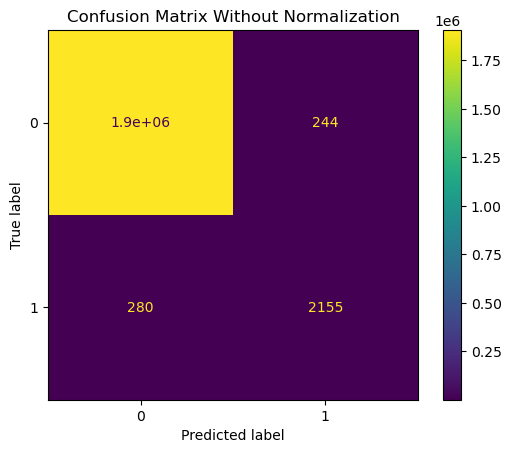

In [35]:
# Confusion Matrix


CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()


In [36]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.89      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



In [37]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')


➤➤➤ Accuracy Score :  99.97 %

➤➤➤ Precision Score :  89.83 %

➤➤➤ Recall Score :  88.50 %

➤➤➤ F1 Score :  89.16 %

➤➤➤ AUC_ROC :  94.24 %



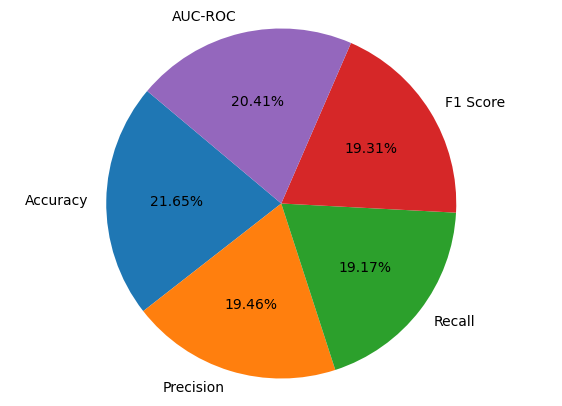

In [38]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()


In [39]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.917644
1,Decision Tree,99.972548
